<a href="https://colab.research.google.com/github/prajaktathalye/PYTHON-PROJECT/blob/main/ECOMMERCE_CUSTOMER_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INSPRECT DATA **


In [ ]:
import pandas as pd



In [ ]:
df = pd.read_csv('/ecommerce_customer_data.csv')

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
# Load the dataset
file_path = '/mnt/data/ecommerce_customer_data.csv'


In [ ]:
# Display the first few rows
print(df.head())

   User_ID  Gender  Age   Location Device_Type  Product_Browsing_Time  \
0        1  Female   23  Ahmedabad      Mobile                     60   
1        2    Male   25    Kolkata      Tablet                     30   
2        3    Male   32  Bangalore     Desktop                     37   
3        4    Male   35      Delhi      Mobile                      7   
4        5    Male   27  Bangalore      Tablet                     35   

   Total_Pages_Viewed  Items_Added_to_Cart  Total_Purchases  
0                  30                    1                0  
1                  38                    9                4  
2                  13                    5                0  
3                  20                   10                3  
4                  20                    8                2  


In [ ]:
# Display basic information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   User_ID                500 non-null    int64 
 1   Gender                 500 non-null    object
 2   Age                    500 non-null    int64 
 3   Location               500 non-null    object
 4   Device_Type            500 non-null    object
 5   Product_Browsing_Time  500 non-null    int64 
 6   Total_Pages_Viewed     500 non-null    int64 
 7   Items_Added_to_Cart    500 non-null    int64 
 8   Total_Purchases        500 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 35.3+ KB
None


In [ ]:
# Display summary statistics
print(df.describe())

          User_ID         Age  Product_Browsing_Time  Total_Pages_Viewed  \
count  500.000000  500.000000             500.000000          500.000000   
mean   250.500000   26.276000              30.740000           27.182000   
std    144.481833    5.114699              15.934246           13.071596   
min      1.000000   18.000000               5.000000            5.000000   
25%    125.750000   22.000000              16.000000           16.000000   
50%    250.500000   26.000000              31.000000           27.000000   
75%    375.250000   31.000000              44.000000           38.000000   
max    500.000000   35.000000              60.000000           50.000000   

       Items_Added_to_Cart  Total_Purchases  
count           500.000000       500.000000  
mean              5.150000         2.464000  
std               3.203127         1.740909  
min               0.000000         0.000000  
25%               2.000000         1.000000  
50%               5.000000         2.00

**DATA CLEANING **

In [ ]:
# Check for missing values
print(df.isnull().sum())

User_ID                  0
Gender                   0
Age                      0
Location                 0
Device_Type              0
Product_Browsing_Time    0
Total_Pages_Viewed       0
Items_Added_to_Cart      0
Total_Purchases          0
dtype: int64


In [ ]:
# Check for duplicate rows
print(df.duplicated().sum())

0


In [ ]:
# Ensure correct data types
# Convert 'Date' column to datetime if it exists
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
print(df.dtypes)


User_ID                   int64
Gender                   object
Age                       int64
Location                 object
Device_Type              object
Product_Browsing_Time     int64
Total_Pages_Viewed        int64
Items_Added_to_Cart       int64
Total_Purchases           int64
dtype: object


**EXPLORATORY DATA ANALYSIS **

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

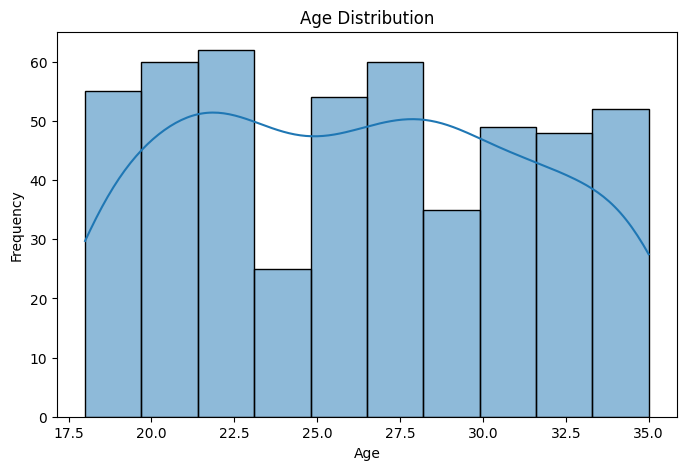

In [ ]:
# Distribution of a numeric column (e.g., Age)
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

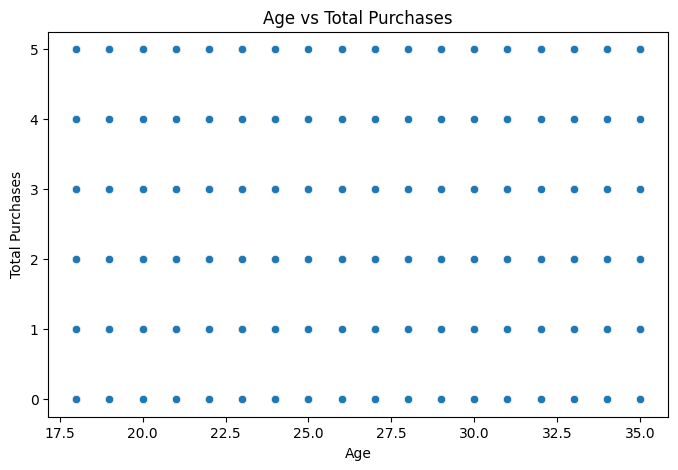

In [ ]:
# Relationship between 'Age' and 'Total_Purchases'
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Total_Purchases', data=df)
plt.title('Age vs Total Purchases')
plt.xlabel('Age')
plt.ylabel('Total Purchases')
plt.show()

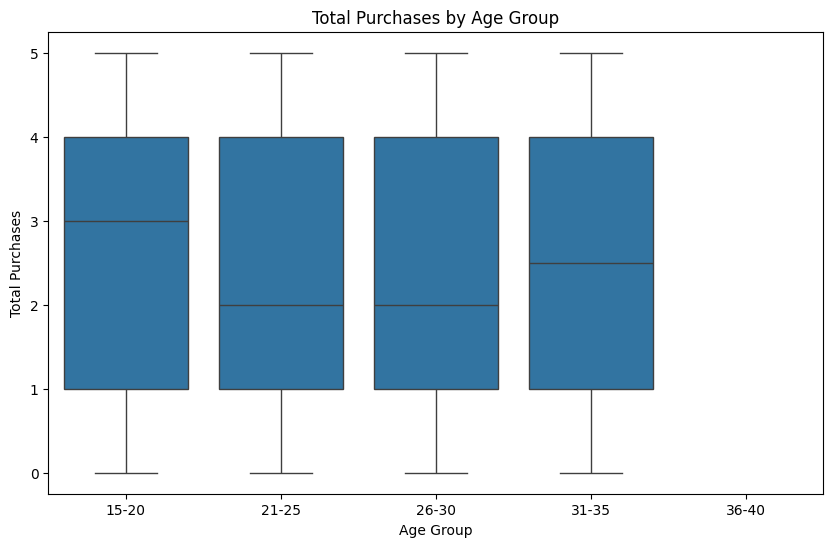

In [ ]:
# Create age bins
df['Age_Group'] = pd.cut(df['Age'], bins=[15, 20, 25, 30, 35, 40], labels=['15-20', '21-25', '26-30', '31-35', '36-40'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Group', y='Total_Purchases', data=df)
plt.title('Total Purchases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Purchases')
plt.show()

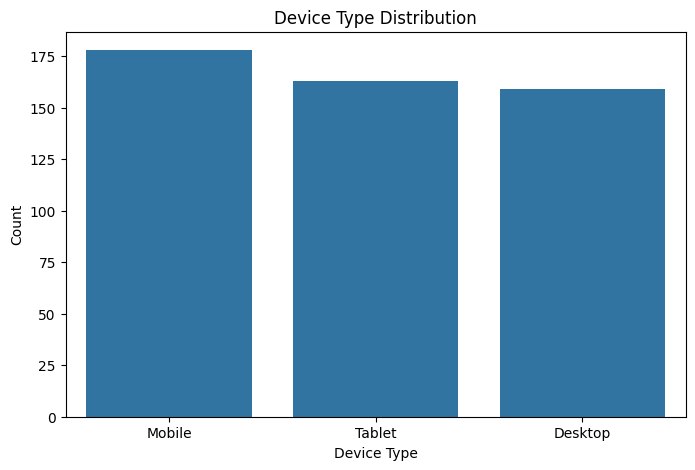

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Device_Type', data=df)
plt.title('Device Type Distribution')
plt.xlabel('Device Type')
plt.ylabel('Count')
plt.show()

<ipython-input-37-cc8125931189>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='Total_Purchases', data=df, estimator=sum, palette='viridis')


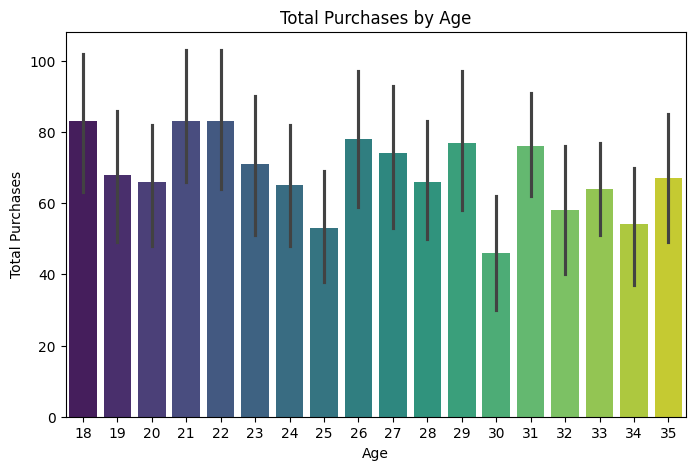

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(x='Age', y='Total_Purchases', data=df, estimator=sum, palette='viridis')
plt.title('Total Purchases by Age')
plt.xlabel('Age')
plt.ylabel('Total Purchases')
plt.show()


**BASIC DATA MODELLING **

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Check if 'Purchased' column exists
if 'Purchased' in df.columns:
    # Select features and target
    X = df[['Age', 'Annual Income']]  # Example feature columns
    y = df['Purchased']  # Example target column

In [ ]:
# Create a 'Purchased' column based on 'Total_Purchases'
df['Purchased'] = df['Total_Purchases'] > 0


In [ ]:
# Select features and target
X = df[['Age', 'Total_Pages_Viewed']]  # Example feature columns
y = df['Purchased'].astype(int)  # Example target column


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.83
Confusion Matrix:
 [[ 0 17]
 [ 0 83]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.83      1.00      0.91        83

    accuracy                           0.83       100
   macro avg       0.41      0.50      0.45       100
weighted avg       0.69      0.83      0.75       100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**VISUALIZATION**

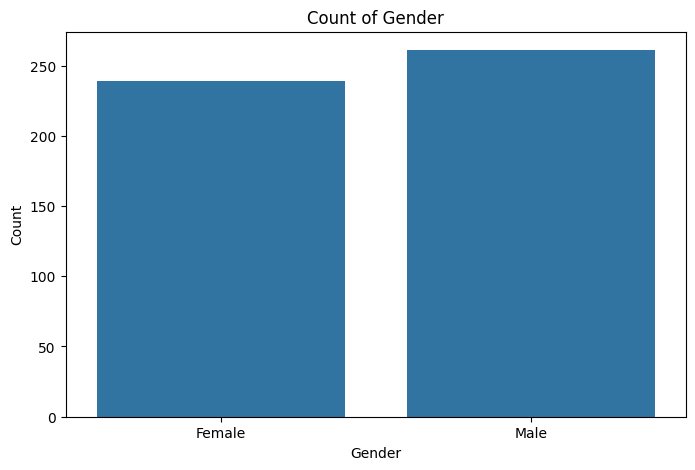

In [ ]:
# Bar plot of categorical variable (e.g., Gender)
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df)
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [ ]:
# Line plot of a time series (e.g., Date vs Total Spending)
if 'Date' in df.columns and 'Total Spending' in df.columns:
    plt.figure(figsize=(10, 6))
    df.groupby('Date')['Total Spending'].sum().plot()
    plt.title('Total Spending Over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Spending')
    plt.show()
else:
    print("The 'Date' or 'Total Spending' column does not exist in the dataset.")

The 'Date' or 'Total Spending' column does not exist in the dataset.
